In [93]:
import pandas as pd
import numpy as np

# 데이터 생성에 필요한 기본 설정
np.random.seed(42)
num_records = 7500

# 데이터 생성
train_data = {
    "ID": [f"TRAIN_{i:04d}" for i in range(num_records)],
    "Exercise_Duration": np.random.uniform(5, 30, size=num_records).round(1),  # 5~30분
    "Body_Temperature(F)": np.random.uniform(102.0, 106.0, size=num_records).round(1),  # 102~106°F
    "BPM": np.random.uniform(80, 110, size=num_records).round(1),  # 80~110
    "Height(Feet)": np.random.choice([4, 5, 6], size=num_records),  # 키 (피트)
    "Height(Remainder_Inches)": np.random.choice(range(0, 12), size=num_records),  # 추가 인치 (0~11)
    "Weight(lb)": np.random.uniform(100, 250, size=num_records).round(1),  # 몸무게 (100~250 lb)
    "Weight_Status": np.random.choice(["Normal Weight", "Overweight"], size=num_records),  # 체중 상태
    "Gender": np.random.choice(["M", "F"], size=num_records),  # 성별
    "Age": np.random.randint(18, 80, size=num_records),  # 나이 (18~80세)
    "Calories_Burned": np.random.uniform(20, 200, size=num_records).round(1)  # 소모 칼로리 (20~200)
}

test_data = {
    "ID": [f"TRAIN_{i:04d}" for i in range(num_records)],
    "Exercise_Duration": np.random.uniform(5, 30, size=num_records).round(1),  # 5~30분
    "Body_Temperature(F)": np.random.uniform(102.0, 106.0, size=num_records).round(1),  # 102~106°F
    "BPM": np.random.uniform(80, 110, size=num_records).round(1),  # 80~110
    "Height(Feet)": np.random.choice([4, 5, 6], size=num_records),  # 키 (피트)
    "Height(Remainder_Inches)": np.random.choice(range(0, 12), size=num_records),  # 추가 인치 (0~11)
    "Weight(lb)": np.random.uniform(100, 250, size=num_records).round(1),  # 몸무게 (100~250 lb)
    "Weight_Status": np.random.choice(["Normal Weight", "Overweight"], size=num_records),  # 체중 상태
    "Gender": np.random.choice(["M", "F"], size=num_records),  # 성별
    "Age": np.random.randint(18, 80, size=num_records),  # 나이 (18~80세)
}
# 데이터프레임 생성
train = pd.DataFrame(train_data)
test = pd.DataFrame(test_data)

In [94]:
# 표준화
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numeric_features = ["Exercise_Duration",  "Body_Temperature(F)", "BPM", "Height(Feet)", "Height(Remainder_Inches)", "Weight(lb)", "Age"]
train_data_scaled = scaler.fit_transform(train[numeric_features])
test_data_scaled = scaler.transform(test[numeric_features])

In [95]:
# 로그 변환
# 비선형적 관계(지수관계)를 선형 관계로 변환해줌
# 한 쪽으로 치우친 데이터를 비교적 대칭적인 형태로 변환함
# 데이터의 크기 차이로 인한 영향을 줄임
import numpy as np
data = [1, 10, 100, 1000, 10000]
log_transformed = np.log(data)
print(log_transformed)

[0.         2.30258509 4.60517019 6.90775528 9.21034037]


In [96]:
import pandas as pd
train = pd.DataFrame(train_data)
test = pd.DataFrame(test_data)
display(train)
display(test)
age_skewness = train.select_dtypes('number').skew()
age_skewness

,ID,Exercise_Duration,Body_Temperature(F),BPM,Height(Feet),Height(Remainder_Inches),Weight(lb),Weight_Status,Gender,Age,Calories_Burned
0,TRAIN_0000,14.4,104.2,95.0,5,9,101.1,Overweight,M,36,71.2
1,TRAIN_0001,28.8,105.3,102.4,6,8,238.3,Normal Weight,M,53,170.8
2,TRAIN_0002,23.3,102.5,96.9,6,8,109.9,Overweight,M,65,160.3
3,TRAIN_0003,20.0,102.5,82.5,4,5,240.8,Overweight,F,54,41.6
4,TRAIN_0004,8.9,104.2,85.6,6,3,104.2,Normal Weight,M,22,59.2
...,...,...,...,...,...,...,...,...,...,...,...
7495,TRAIN_7495,7.0,104.6,101.3,6,1,110.6,Overweight,F,63,98.4
7496,TRAIN_7496,6.8,102.7,106.0,5,1,149.8,Overweight,M,44,53.9
7497,TRAIN_7497,26.3,102.2,109.3,6,8,223.1,Normal Weight,M,41,28.8
7498,TRAIN_7498,10.3,104.7,108.6,4,7,245.2,Normal Weight,F,27,131.3


,ID,Exercise_Duration,Body_Temperature(F),BPM,Height(Feet),Height(Remainder_Inches),Weight(lb),Weight_Status,Gender,Age
0,TRAIN_0000,20.2,103.1,91.7,6,3,107.1,Normal Weight,M,36
1,TRAIN_0001,17.5,103.0,88.4,4,6,238.5,Overweight,M,49
2,TRAIN_0002,29.3,104.0,83.1,5,7,169.3,Normal Weight,F,40
3,TRAIN_0003,5.6,105.0,105.5,4,10,236.5,Overweight,F,61
4,TRAIN_0004,29.7,104.6,108.5,5,10,225.5,Normal Weight,F,70
...,...,...,...,...,...,...,...,...,...,...
7495,TRAIN_7495,26.1,105.0,82.1,4,7,228.8,Overweight,M,71
7496,TRAIN_7496,8.5,103.7,98.1,6,5,126.6,Overweight,M,42
7497,TRAIN_7497,25.2,105.4,93.3,4,3,201.2,Overweight,F,20
7498,TRAIN_7498,8.5,103.7,87.7,6,8,173.4,Overweight,F,56


Exercise_Duration           0.020933
Body_Temperature(F)         0.017716
BPM                        -0.050950
Height(Feet)               -0.012569
Height(Remainder_Inches)   -0.036895
Weight(lb)                  0.005287
Age                         0.004504
Calories_Burned            -0.036138
dtype: float64

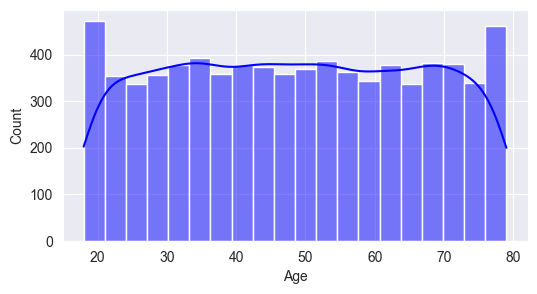

In [97]:
# 분포 확인
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize = (6, 3)) # 사이즈 설정
sns.histplot(train['Age'], kde = True, color = 'blue') # 히스토그램 생성, kde: 커널 밀도 추정 곡선(데이터 분포의 추세를 부드럽게 나타내주는 곡선)
plt.show()

In [98]:
# 성능 평가 지표
# RMSE(Root Mean Squared Error): 평균 오차 제곱의 제곱근
# 큰 오차에 영향을 크게 받음. 같은 오차라도 일관성이 없으면 더 크게 나타남
# 상대적으로 작은 오차를 반영하지 못함
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np
y_true = np.random.rand(1, 10) * 10
y_pred = np.random.rand(1, 10) * 10
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
print(f'RMSE: {rmse}')
# MAE(Mean Absolute Error): 오차 절대값의 평균
# 모든 오차를 동일하게 취급
mae = mean_absolute_error(y_true, y_pred)
print(f'MAE: {mae}')


RMSE: 4.28738253301029
MAE: 3.754238344645784


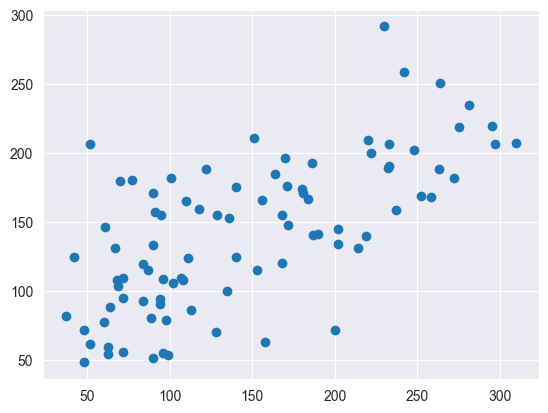

RMSE: 2900.19362849348
MAE: 42.79409467959994


In [99]:
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error
diabetes = load_diabetes()
X = diabetes.data
Y = diabetes.target
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
plt.scatter(y_test, y_pred)
plt.show()
rmse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')



In [100]:
import pandas as pd
import numpy as np
train = pd.DataFrame(train_data)
test = pd.DataFrame(test_data)
display(train)
display(test)
train.info()

,ID,Exercise_Duration,Body_Temperature(F),BPM,Height(Feet),Height(Remainder_Inches),Weight(lb),Weight_Status,Gender,Age,Calories_Burned
0,TRAIN_0000,14.4,104.2,95.0,5,9,101.1,Overweight,M,36,71.2
1,TRAIN_0001,28.8,105.3,102.4,6,8,238.3,Normal Weight,M,53,170.8
2,TRAIN_0002,23.3,102.5,96.9,6,8,109.9,Overweight,M,65,160.3
3,TRAIN_0003,20.0,102.5,82.5,4,5,240.8,Overweight,F,54,41.6
4,TRAIN_0004,8.9,104.2,85.6,6,3,104.2,Normal Weight,M,22,59.2
...,...,...,...,...,...,...,...,...,...,...,...
7495,TRAIN_7495,7.0,104.6,101.3,6,1,110.6,Overweight,F,63,98.4
7496,TRAIN_7496,6.8,102.7,106.0,5,1,149.8,Overweight,M,44,53.9
7497,TRAIN_7497,26.3,102.2,109.3,6,8,223.1,Normal Weight,M,41,28.8
7498,TRAIN_7498,10.3,104.7,108.6,4,7,245.2,Normal Weight,F,27,131.3


,ID,Exercise_Duration,Body_Temperature(F),BPM,Height(Feet),Height(Remainder_Inches),Weight(lb),Weight_Status,Gender,Age
0,TRAIN_0000,20.2,103.1,91.7,6,3,107.1,Normal Weight,M,36
1,TRAIN_0001,17.5,103.0,88.4,4,6,238.5,Overweight,M,49
2,TRAIN_0002,29.3,104.0,83.1,5,7,169.3,Normal Weight,F,40
3,TRAIN_0003,5.6,105.0,105.5,4,10,236.5,Overweight,F,61
4,TRAIN_0004,29.7,104.6,108.5,5,10,225.5,Normal Weight,F,70
...,...,...,...,...,...,...,...,...,...,...
7495,TRAIN_7495,26.1,105.0,82.1,4,7,228.8,Overweight,M,71
7496,TRAIN_7496,8.5,103.7,98.1,6,5,126.6,Overweight,M,42
7497,TRAIN_7497,25.2,105.4,93.3,4,3,201.2,Overweight,F,20
7498,TRAIN_7498,8.5,103.7,87.7,6,8,173.4,Overweight,F,56


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID                        7500 non-null   object 
 1   Exercise_Duration         7500 non-null   float64
 2   Body_Temperature(F)       7500 non-null   float64
 3   BPM                       7500 non-null   float64
 4   Height(Feet)              7500 non-null   int64  
 5   Height(Remainder_Inches)  7500 non-null   int64  
 6   Weight(lb)                7500 non-null   float64
 7   Weight_Status             7500 non-null   object 
 8   Gender                    7500 non-null   object 
 9   Age                       7500 non-null   int32  
 10  Calories_Burned           7500 non-null   float64
dtypes: float64(5), int32(1), int64(2), object(3)
memory usage: 615.4+ KB


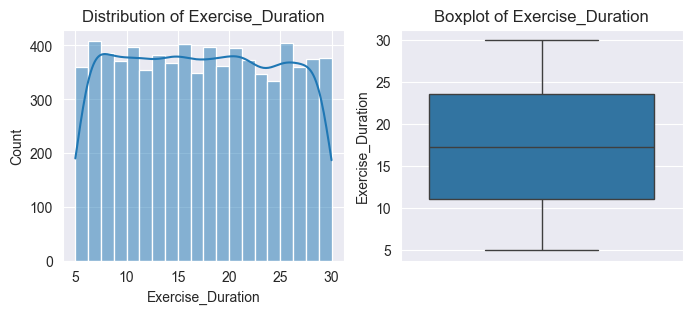

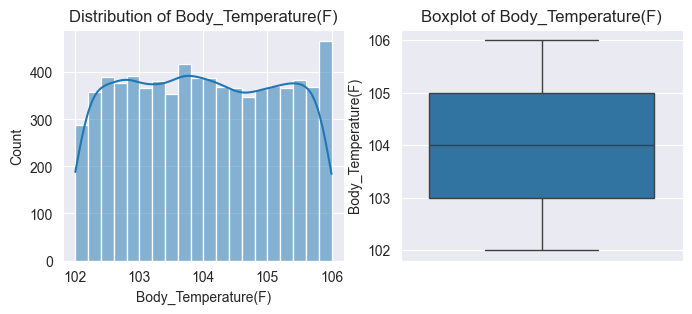

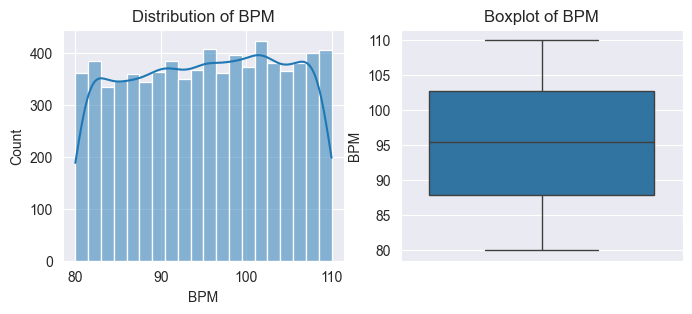

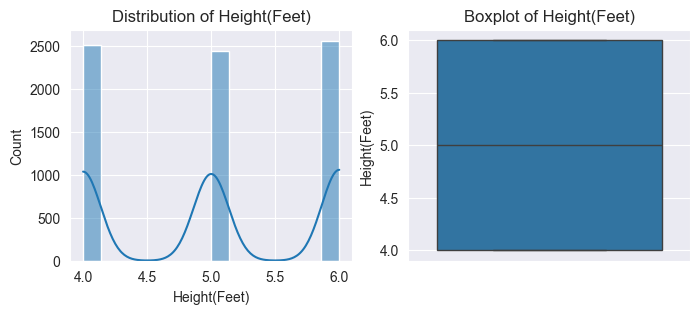

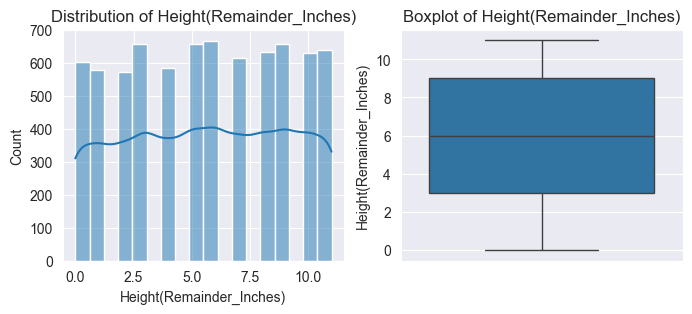

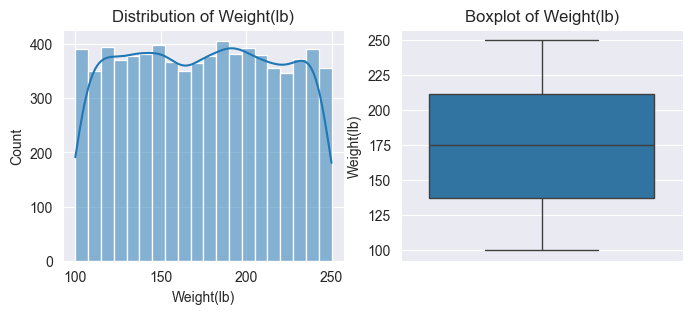

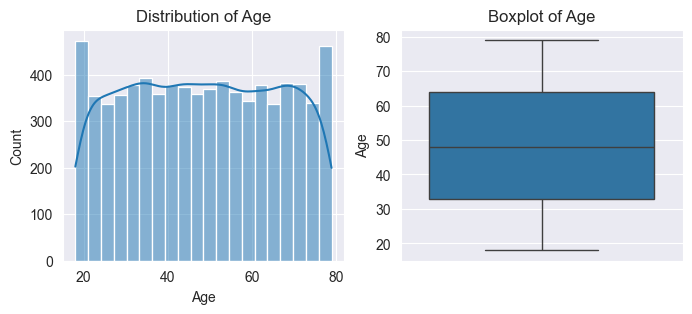

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt
numerical_features = train.select_dtypes(include = [np.number]).columns.tolist()[:-1]
for feature in numerical_features:
    plt.figure(figsize = (8, 3))
    plt.subplot(1, 2, 1)
    sns.histplot(train[feature], kde = True)
    plt.title(f'Distribution of {feature}')
    plt.subplot(1, 2, 2)
    sns.boxplot(y = train[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()

In [102]:
from sklearn.model_selection import train_test_split
X = train.drop(['ID', 'Calories_Burned', 'Weight_Status', 'Gender'], axis = 1)
y = train['Calories_Burned']
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.2, random_state = 42)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_to_scale = ['Exercise_Duration', 'BPM', 'Height(Feet)',
       'Height(Remainder_Inches)', 'Weight(lb)']
X_train[features_to_scale] = (scaler.fit_transform(X_train[features_to_scale]))
X_valid[features_to_scale] = (scaler.transform(X_valid[features_to_scale]))
feature_to_log_transform = ['Age', 'Body_Temperature(F)']
X_train[feature_to_log_transform] = np.log(X_train[feature_to_log_transform])
X_valid[feature_to_log_transform] = np.log(X_valid[feature_to_log_transform])


In [103]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_valid)
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))
mae = mean_absolute_error(y_valid, y_pred)
print(f'RMSE: {rmse}')
print(f'MAE: {mae}')


RMSE: 51.954503429053766
MAE: 45.06648607388711


In [105]:
from sklearn.ensemble import RandomForestRegressor

# 모델 정의
RF_model = RandomForestRegressor()
RF_model.fit(X_train, y_train)
RF_y_pred = RF_model.predict(X_valid)

# 성능 평가
RF_rmse = np.sqrt(mean_squared_error(y_valid, RF_y_pred))
RF_mae = mean_absolute_error(y_valid, RF_y_pred)

print(f'RF_RMSE: {RF_rmse}')
print(f'RF_MAE: {RF_mae}')

RF_RMSE: 53.39439664995445
RF_MAE: 45.922098


In [107]:
X_test = test.drop(['ID', 'Gender', 'Weight_Status'], axis = 1)
X_test[features_to_scale] = scaler.transform(X_test[features_to_scale])
X_test[feature_to_log_transform] = np.log(X_test[feature_to_log_transform])
RF_model.predict(X_test)

array([ 98.492,  96.43 , 130.468, ..., 114.912, 127.364, 105.484],
      shape=(7500,))